# 1 read data

## 1.1 Observe eigenvalues

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./pre-owned cars.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2805 non-null   object 
 1   model                2805 non-null   object 
 2   transmission         2805 non-null   object 
 3   make_year            2805 non-null   float64
 4   reg_year             720 non-null    object 
 5   fuel_type            2805 non-null   object 
 6   engine_capacity(CC)  2688 non-null   float64
 7   km_driven            2805 non-null   float64
 8   ownership            2805 non-null   object 
 9   price                2806 non-null   int64  
 10  overall_cost         2805 non-null   float64
 11  has_insurance        2805 non-null   object 
 12  spare_key            2805 non-null   object 
 13  reg_number           2805 non-null   object 
 14  title                2805 non-null   object 
dtypes: float64(4), int64(1), object(10)
me

# **<font color = red>Task: Find factors related to selling price</font>**

# 2 Data cleaning

## 2.1 Check for duplicate data

In [3]:
print(df.duplicated().sum())
df[df.duplicated(keep=False)]

1


brand                 model transmission  make_year reg_year  \
929   Hyundai  NEW SANTRO SPORTZ MT       Manual     2019.0      NaN   
1617  Hyundai  NEW SANTRO SPORTZ MT       Manual     2019.0      NaN   

     fuel_type  engine_capacity(CC)  km_driven  ownership   price  \
929     Petrol               1086.0    33811.0  1st owner  483000   
1617    Petrol               1086.0    33811.0  1st owner  483000   

      overall_cost has_insurance spare_key reg_number  \
929         9442.0          True        No       KA05   
1617        9442.0          True        No       KA05   

                                  title  
929   2019 Hyundai NEW SANTRO SPORTZ MT  
1617  2019 Hyundai NEW SANTRO SPORTZ MT

###  *<font color = red>2.1.1 del duplicate data</font>*

In [4]:
#del
df.drop(929,axis = 0,inplace=True)
df.duplicated().sum()

0

## 2.2 Check for missing value 

In [5]:
df.isnull().sum()

brand                     1
model                     1
transmission              1
make_year                 1
reg_year               2085
fuel_type                 1
engine_capacity(CC)     118
km_driven                 1
ownership                 1
price                     0
overall_cost              1
has_insurance             1
spare_key                 1
reg_number                1
title                     1
dtype: int64

###  *<font color = red>2.2.1 Handling missing values</font>*

In [6]:
#for reg_year too many null,we must delete
df.drop('reg_year', axis=1,inplace=True)

#for engine_capacity(CC),intermediate value padding
engine_median = df['engine_capacity(CC)'].median()
df['engine_capacity(CC)'] = df['engine_capacity(CC)'].fillna(engine_median)
print(df.isnull().sum())

#directly delete a small number of null values
df.dropna(axis = 0,inplace=True)
print(df.isnull().sum())

brand                  1
model                  1
transmission           1
make_year              1
fuel_type              1
engine_capacity(CC)    0
km_driven              1
ownership              1
price                  0
overall_cost           1
has_insurance          1
spare_key              1
reg_number             1
title                  1
dtype: int64
brand                  0
model                  0
transmission           0
make_year              0
fuel_type              0
engine_capacity(CC)    0
km_driven              0
ownership              0
price                  0
overall_cost           0
has_insurance          0
spare_key              0
reg_number             0
title                  0
dtype: int64


## 2.3 Plot boxplots for continuous variables

<Figure size 375x375 with 0 Axes>

<Figure size 375x375 with 0 Axes>

<Figure size 375x375 with 0 Axes>

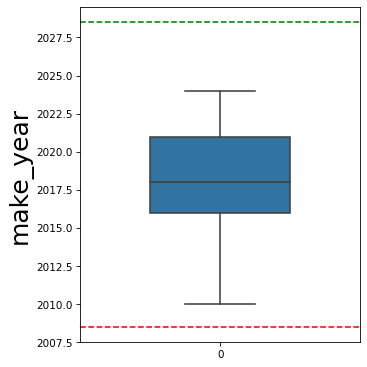

<Figure size 375x375 with 0 Axes>

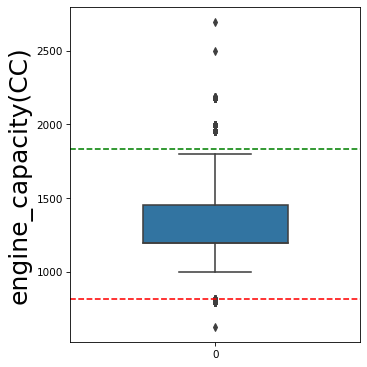

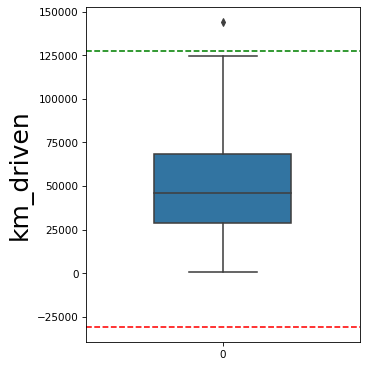

<Figure size 375x375 with 0 Axes>

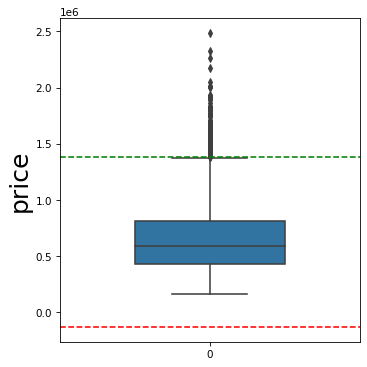

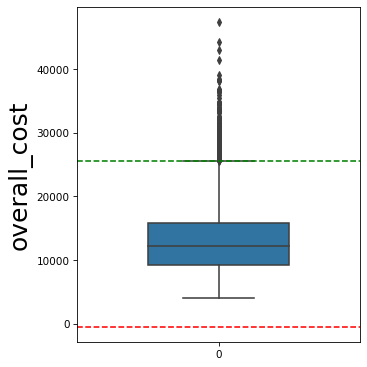

<Figure size 375x375 with 0 Axes>

<Figure size 375x375 with 0 Axes>

<Figure size 375x375 with 0 Axes>

<Figure size 375x375 with 0 Axes>

In [7]:
for i in df.columns:
    fig = plt.figure(figsize=(5,5),dpi=75)
    if df[i].dtype == "object":
        continue
    sns.boxplot(data = df[i],width = 0.5)
    plt.ylabel(i, fontsize=24)
    
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    
    
    plt.axhline(y=Q1 - 1.5 * IQR, color='r', linestyle='--'
                , label='Lower Bound (Q1 - 1.5*IQR)')
    plt.axhline(y=Q3 + 1.5 * IQR, color='g', linestyle='--'
            , label='Upper Bound (Q3 + 1.5*IQR)')
    
    plt.tight_layout()
    plt.show()

### 2.3.1 Remove outliers

In [8]:
#Remove outliers
print(len(df))
for i in df.columns:
    if df[i].dtype == "object":
        continue
    print(i)
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
len(df)

2804
make_year
engine_capacity(CC)
km_driven
price
overall_cost


2477

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 1 to 2804
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2477 non-null   object 
 1   model                2477 non-null   object 
 2   transmission         2477 non-null   object 
 3   make_year            2477 non-null   float64
 4   fuel_type            2477 non-null   object 
 5   engine_capacity(CC)  2477 non-null   float64
 6   km_driven            2477 non-null   float64
 7   ownership            2477 non-null   object 
 8   price                2477 non-null   int64  
 9   overall_cost         2477 non-null   float64
 10  has_insurance        2477 non-null   object 
 11  spare_key            2477 non-null   object 
 12  reg_number           2477 non-null   object 
 13  title                2477 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 290.3+ KB


# 3 Data visualization

## 3.1 Plot a violin plot(vs price)

### 3.1.1 Brand violin plot

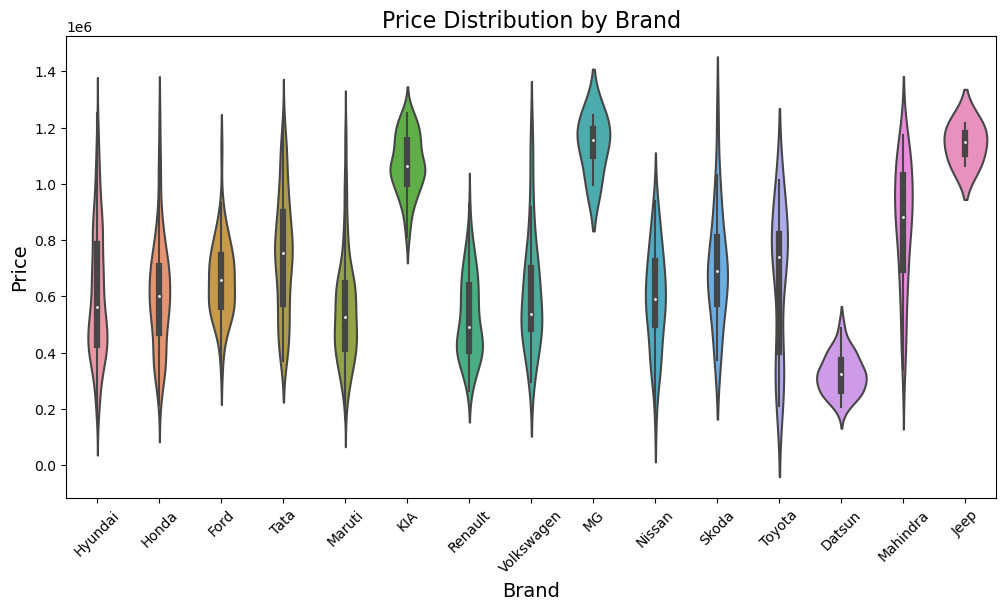

In [10]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='brand', y='price', data=df)
plt.title('Price Distribution by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)

plt.show()

### 3.1.2 Transmission violin plot

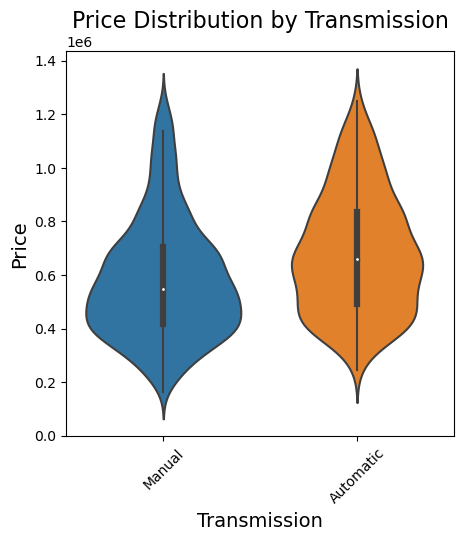

In [11]:
plt.figure(figsize=(5, 5))
sns.violinplot(x='transmission', y='price', data=df)
plt.title('Price Distribution by Transmission', fontsize=16)
plt.xlabel('Transmission', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)

plt.show()

### 3.1.3 Fuel_type violin plot

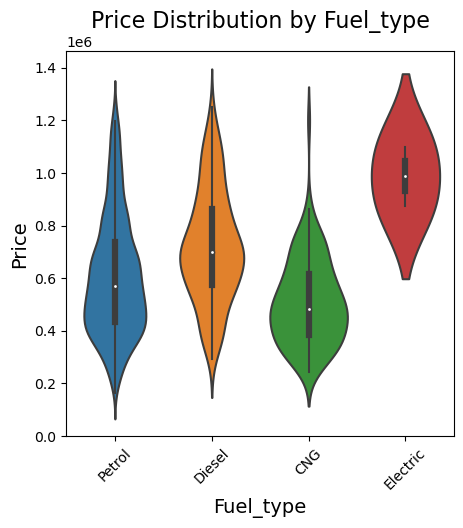

In [12]:
plt.figure(figsize=(5, 5))
sns.violinplot(x='fuel_type', y='price', data=df)
plt.title('Price Distribution by Fuel_type', fontsize=16)
plt.xlabel('Fuel_type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)

plt.show()

### 3.1.4 ownership violin plot

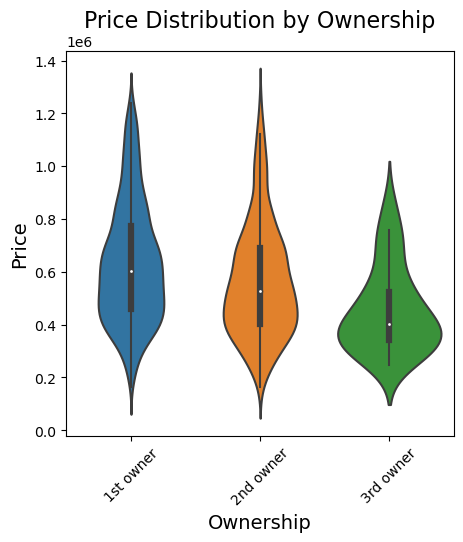

In [13]:
plt.figure(figsize=(5, 5))
sns.violinplot(x='ownership', y='price', data=df)
plt.title('Price Distribution by Ownership', fontsize=16)
plt.xlabel('Ownership', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)

plt.show()

### 3.1.5 Has_insurance violin plot

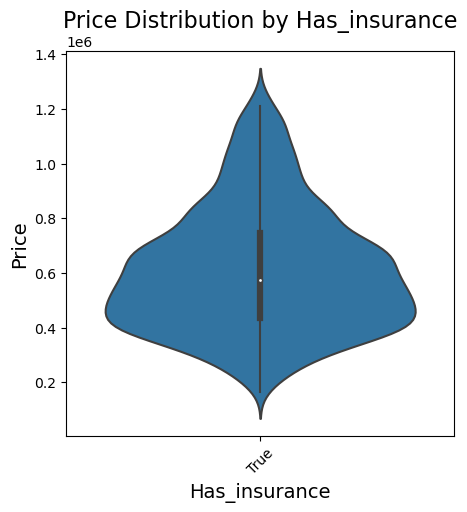

In [14]:
plt.figure(figsize=(5, 5))
sns.violinplot(x='has_insurance', y='price', data=df)
plt.title('Price Distribution by Has_insurance', fontsize=16)
plt.xlabel('Has_insurance', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)

plt.show()

### 3.1.6 spare_key violin plot

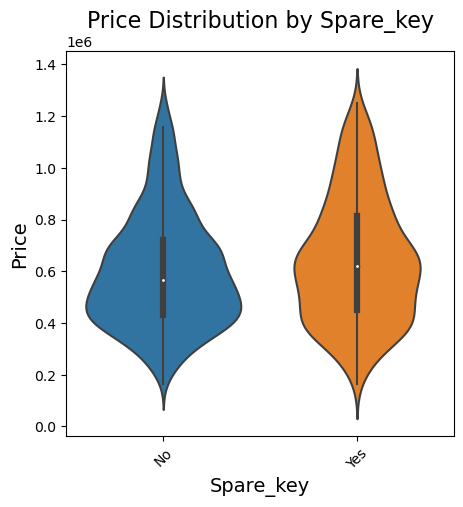

In [15]:
plt.figure(figsize=(5, 5))
sns.violinplot(x='spare_key', y='price', data=df)
plt.title('Price Distribution by Spare_key', fontsize=16)
plt.xlabel('Spare_key', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)

plt.show()

### 3.1.7 reg_number violin plot

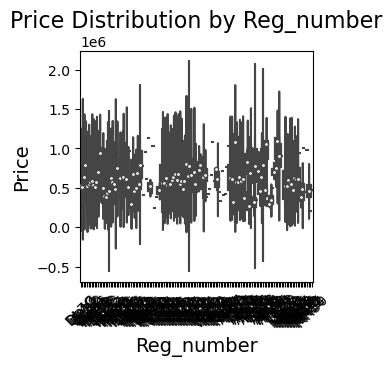

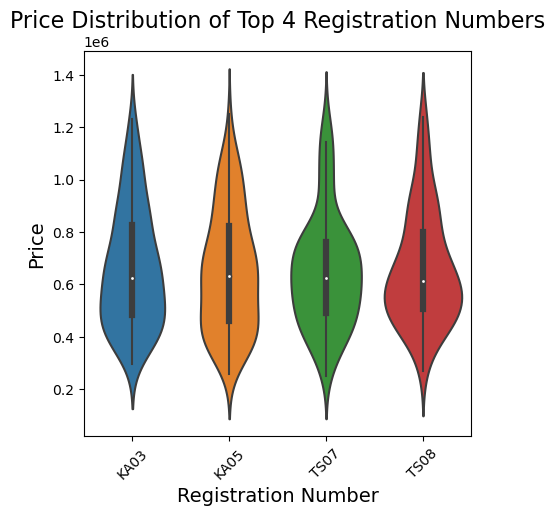

In [16]:
plt.figure(figsize=(3, 3))
sns.violinplot(x='reg_number', y='price', data=df)
plt.title('Price Distribution by Reg_number', fontsize=16)
plt.xlabel('Reg_number', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.show()

#Because there are too many categories, the violin plot is not clear enough.
#We choose the four most frequently observed ones.
top_reg_numbers = df['reg_number'].value_counts().nlargest(4).index
filtered_df = df[df['reg_number'].isin(top_reg_numbers)]

plt.figure(figsize=(5, 5))
sns.violinplot(x='reg_number', y='price', data=filtered_df)
plt.title('Price Distribution of Top 4 Registration Numbers', fontsize=16)
plt.xlabel('Registration Number', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.show()

## 3.3 Year and price line chart

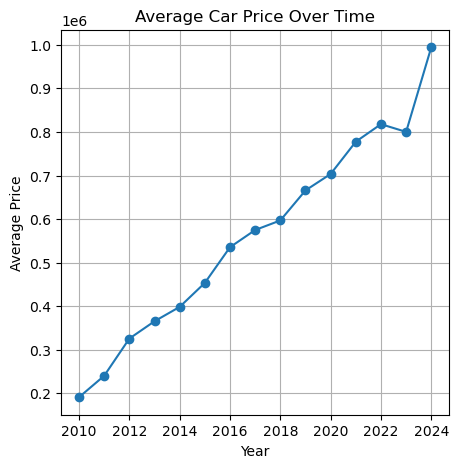

In [17]:

df['make_year'] = df['make_year'].astype(int)


plt.figure(figsize=(5, 5))
average_price_by_year = df.groupby('make_year')['price'].mean()

plt.plot(average_price_by_year.index, average_price_by_year.values, marker='o')
plt.title('Average Car Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid()
plt.show()


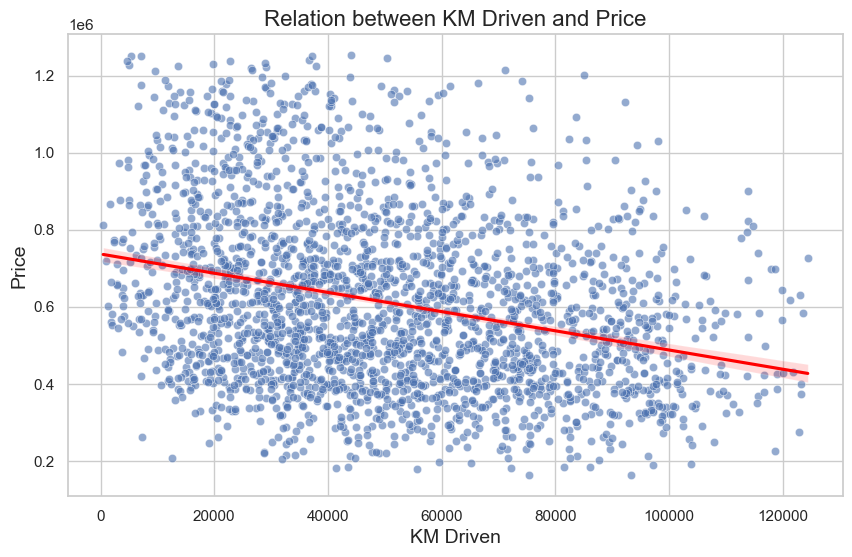

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='km_driven', y='price', alpha=0.6)

# 添加回归线
sns.regplot(data=df, x='km_driven', y='price', scatter=False, color='red')

plt.title('Relation between KM Driven and Price', fontsize=16)
plt.xlabel('KM Driven', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show()

## 3.4 Fuel Type and Model KDEPlot

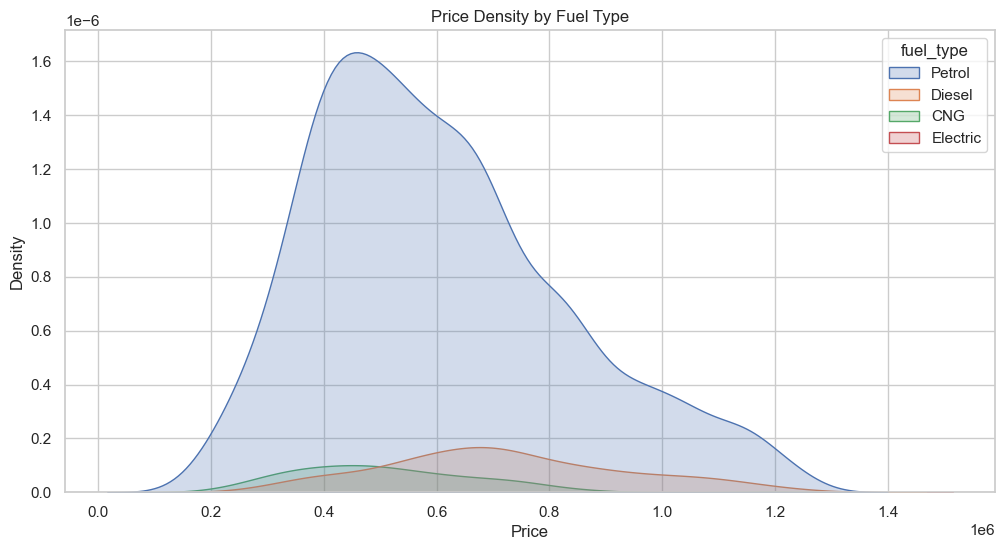

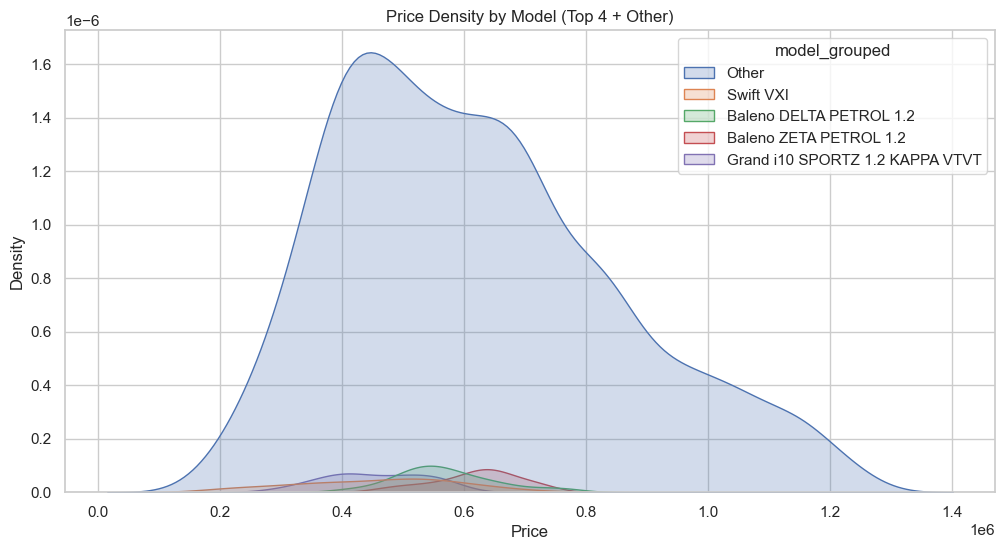

In [19]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='price', hue='fuel_type', fill=True)
plt.title('Price Density by Fuel Type')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

top_models = df['model'].value_counts().nlargest(4).index
df['model_grouped'] = df['model'].where(df['model'].isin(top_models), 'Other')
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='price', hue='model_grouped', fill=True)
plt.title('Price Density by Model (Top 4 + Other)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

df.drop('model_grouped',axis = 1,inplace=True)

## 3.5 Plot the thermodynamic coefficients

C:\Users\35730\AppData\Local\Temp\ipykernel_2524\4250551841.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


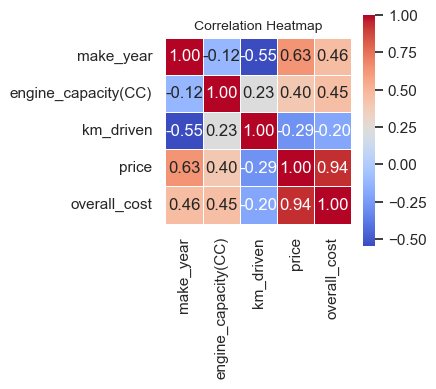

In [20]:
correlation_matrix = df.corr()
plt.figure(figsize=(3, 3))
heatmap = sns.heatmap(correlation_matrix, annot=True,
                      fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=10)
plt.show()

In [21]:
import plotly.express as px
fig = px.scatter(df, x='make_year', y='price', color='brand', hover_data=['model'])
fig.update_layout(title='Mileage vs. Price by Make')
fig.show()

#####  **<font color = red>Through the analysis of the above data, it was found that the categorical type variables related to prices:<br><br>Positive correlation<br>①brand②transmission③fuel_type④ownership⑤make_year⑥engine_capacity(CC)⑦overall_cost<br>Negative correlation<br>①km_drive</font>**

#  **<font color = red> 4 Feature engineering</font>**

## 4.1 Remove unnecessary features

In [22]:
#'title' is an unnecessary introduction to the vehicle
df.drop('title', axis=1, inplace=True)
#'has_insurance' only one feature
df.drop('has_insurance', axis=1, inplace=True)
#It can be seen from the violin plot that the registration is not very important
df.drop('reg_number', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 1 to 2804
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2477 non-null   object 
 1   model                2477 non-null   object 
 2   transmission         2477 non-null   object 
 3   make_year            2477 non-null   int32  
 4   fuel_type            2477 non-null   object 
 5   engine_capacity(CC)  2477 non-null   float64
 6   km_driven            2477 non-null   float64
 7   ownership            2477 non-null   object 
 8   price                2477 non-null   int64  
 9   overall_cost         2477 non-null   float64
 10  spare_key            2477 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 222.5+ KB


## 4.1 Adding new features

In [23]:
df['brand_model'] = df['brand'] + '_' + df['model']

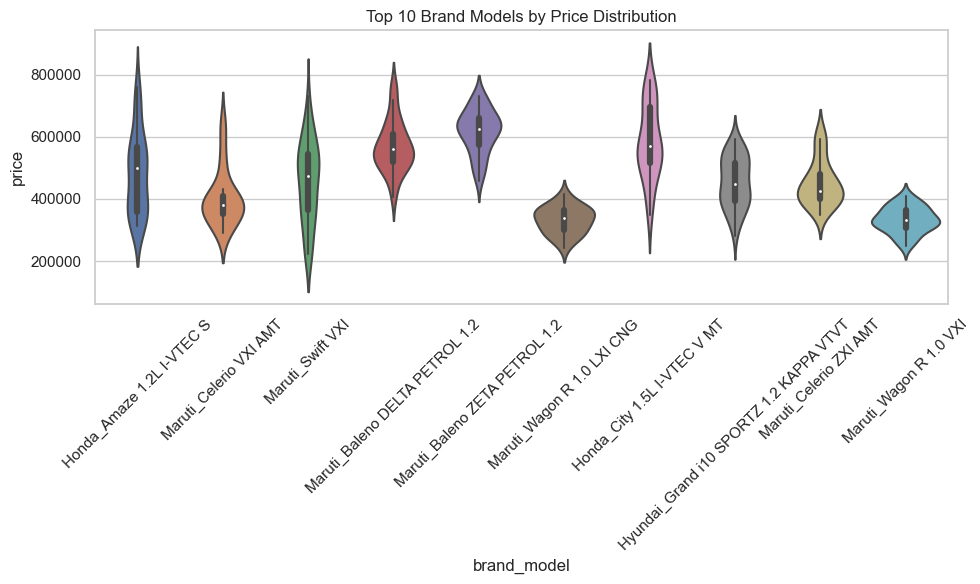

In [26]:

# 选取前10个brand_model
top_10 = df['brand_model'].value_counts().nlargest(10).index
df_top_10 = df[df['brand_model'].isin(top_10)]

# 画小提琴图
plt.figure(figsize=(10, 6))
sns.violinplot(x='brand_model', y='price', data=df_top_10)
plt.xticks(rotation=45)
plt.title('Top 10 Brand Models by Price Distribution')
plt.tight_layout()

## 4.2 Categorical variable coding

In [27]:
#trun string data convert to numeric form
df = pd.get_dummies(df, columns=
                    ['brand', 'model',
                     'transmission', 'fuel_type',
                     'spare_key'],
                    drop_first=True)

In [28]:
df.head(100)

make_year  engine_capacity(CC)  km_driven  ownership    price  \
1         2018               1591.0    66936.0  1st owner   786000   
3         2023               1498.0     5061.0  1st owner  1227000   
4         2021               1498.0    23480.0  1st owner   887000   
5         2021               1199.0    44787.0  1st owner   796000   
6         2022               1199.0      450.0  1st owner   813000   
..         ...                  ...        ...        ...      ...   
105       2017                999.0    41308.0  3rd owner   285000   
106       2018               1199.0    94259.0  1st owner   384000   
107       2016               1199.0    79166.0  1st owner   382000   
108       2019               1086.0    61839.0  2nd owner   397000   
109       2020               1197.0    46628.0  1st owner   522000   

     overall_cost                             brand_model  brand_Ford  \
1         15359.0               Hyundai_Verna 1.6 VTVT SX           0   
3         23355.0             Honda_City 1.5L I-VTE V CVT           0   
4         16883.0      Ford_Ecosport TITANIUM 1.5L DIESEL           1   
5         15561.0            Honda_WR-V 1.2L I-VTEC VX MT           0   
6         15475.0  Tata_PUNCH CREATIVE  1.2 RTN DUAL TONE           0   
..            ...                                     ...         ...   
105        5580.0            Renault_Kwid CLIMBER 1.0 AMT           0   
106        7506.0                    Tata_Tiago XT PETROL           0   
107        7461.0                Honda_Jazz 1.2L I-VTEC V           0   
108        7761.0            Hyundai_NEW SANTRO SPORTZ MT           0   
109       10205.0          Maruti_Baleno SIGMA PETROL 1.2           0   

     brand_Honda  brand_Hyundai  ...  model_i20 MAGNA (O) 1.2  \
1              0              1  ...                        0   
3              1              0  ...                        0   
4              0              0  ...                        0   
5              1              0  ...                        0   
6              0              0  ...                        0   
..           ...            ...  ...                      ...   
105            0              0  ...                        0   
106            0              0  ...                        0   
107            1              0  ...                        0   
108            0              1  ...                        0   
109            0              0  ...                        0   

     model_i20 MAGNA 1.2  model_i20 SPORTZ (O) 1.2  model_i20 SPORTZ 1.2  \
1                      0                         0                     0   
3                      0                         0                     0   
4                      0                         0                     0   
5                      0                         0                     0   
6                      0                         0                     0   
..                   ...                       ...                   ...   
105                    0                         0                     0   
106                    0                         0                     0   
107                    0                         0                     0   
108                    0                         0                     0   
109                    0                         0                     0   

     model_i20 SPORTZ 1.4 CRDI  transmission_Manual  fuel_type_Diesel  \
1                            0                    1                 0   
3                            0                    0                 0   
4                            0                    1                 1   
5                            0                    1                 0   
6                            0                    1                 0   
..                         ...                  ...               ...   
105                          0                    0                 0   
106      

## 4.3 Divide driven type data into three categories

In [29]:
df['km_driven_category'] = pd.qcut(df['km_driven'], q=4, labels=['low', 'medium', 'high', 'very_high'])
print(df[['km_driven', 'km_driven_category']].head())

   km_driven km_driven_category
1    66936.0               high
3     5061.0                low
4    23480.0                low
5    44787.0             medium
6      450.0                low
